### Outliers Detection with Z Score Method

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Here’s a sample dataset of tree lengths (meters)
data = pd.DataFrame({'Length': [10,12,14,10,15,18,20,13,11,17,60,1]})

# Calculate the mean and standard deviation
mean = np.mean(data['Length'])
std = np.std(data['Length'])

# Calculate the Z-Score
data['Z-Score'] = (data['Length'] - mean) / std
data

,Length,Z-Score
0,10,-0.487324
1,12,-0.342932
2,14,-0.198540
3,10,-0.487324
4,15,-0.126343
5,18,0.090245
6,20,0.234638
7,13,-0.270736
8,11,-0.415128
9,17,0.018049


In [3]:
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['Z-Score'] > 3]}")

Here are the outliers based on the z-score threshold, 3:
     Length   Z-Score
10      60  3.122486


In [4]:
# Remove the outliers
data = data[data['Z-Score'] <= 3]

# Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

Here is the data without outliers:
     Length   Z-Score
0       10 -0.487324
1       12 -0.342932
2       14 -0.198540
3       10 -0.487324
4       15 -0.126343
5       18  0.090245
6       20  0.234638
7       13 -0.270736
8       11 -0.415128
9       17  0.018049
11       1 -1.137090


In [5]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [10,12,14,10,15,18,20,13,11,17,60,1]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [10, 12, 14, 10, 15, 18, 20, 13, 11, 17, 60, 1]
----------------------------------------
Indices of Outliers: [10]
Outliers: [60]
----------------------------------------
Data without outliers: [10, 12, 14, 10, 15, 18, 20, 13, 11, 17, 1]


### Outliers Detection with IQR

In [13]:
# Import the required libraries
import pandas as pd
import numpy as np

# Create the data and sort it in ascending order
data = pd.DataFrame({'Age': sorted([12, 14, 22, 16, 18, 19, 22, 20, 22, 25, 28, 30, 34, 37, 40, 42, 45, 48, 55, 100])})

# Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25)  # 25th percentile
Q3 = np.percentile(data['Age'], 75)  # 75th percentile

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Print the sorted data
print("----------------------------------------")
print(f"Here is the sorted data:\n {data}")
print("----------------------------------------")

# Find and print the outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(f"Here are the outliers based on the IQR threshold:\n {outliers}")
print("----------------------------------------")

# Remove the outliers
cleaned_data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Print the data without outliers
print(f"Here is the data without outliers:\n {cleaned_data}")


----------------------------------------
Here is the sorted data:
     Age
0    12
1    14
2    16
3    18
4    19
5    20
6    22
7    22
8    22
9    25
10   28
11   30
12   34
13   37
14   40
15   42
16   45
17   48
18   55
19  100
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
19  100
----------------------------------------
Here is the data without outliers:
     Age
0    12
1    14
2    16
3    18
4    19
5    20
6    22
7    22
8    22
9    25
10   28
11   30
12   34
13   37
14   40
15   42
16   45
17   48
18   55


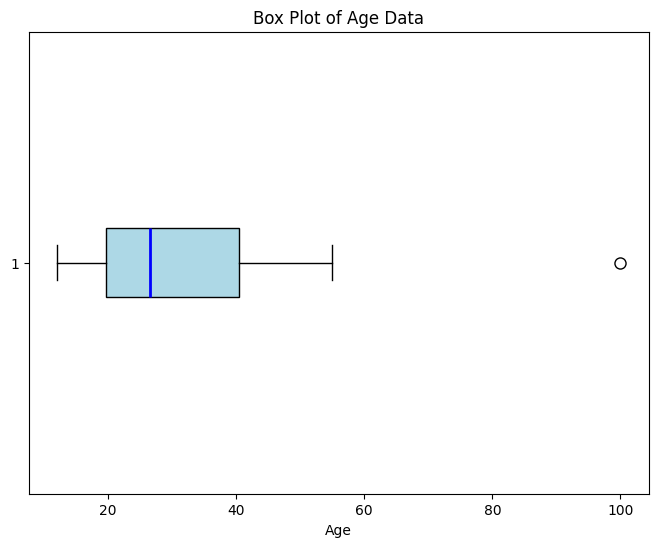

In [14]:
import matplotlib.pyplot as plt

# Create a box plot for the 'Age' data from the DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), 
            whiskerprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8), 
            medianprops=dict(color='blue', linewidth=2))

# Title and labels
plt.title("Box Plot of Age Data")
plt.xlabel("Age")

# Show the plot
plt.show()


In [8]:
import numpy as np
import pandas as pd

# 1. Normal Distribution
# Generate a normal distribution with mean=50, std deviation=10, and sample size=1000
mean = 50
std_dev = 10
size = 1000

normal_data = np.random.normal(loc=mean, scale=std_dev, size=size)

# Create DataFrame for normal distribution
normal_df = pd.DataFrame({'Age': normal_data})

# 2. Skewed Distribution (Right Skewed using Exponential Distribution)
# Generate skewed data with scale=50 (larger values) and size=1000
skewed_data = np.random.exponential(scale=50, size=size)

# Create DataFrame for skewed distribution
skewed_df = pd.DataFrame({'Age': skewed_data})

# Show first few rows of both DataFrames
print("Normal Distribution DataFrame:")
print(normal_df.head())

print("\nSkewed Distribution DataFrame:")
print(skewed_df.head())


Normal Distribution DataFrame:
         Age
0  58.429953
1  38.109696
2  43.333675
3  39.302016
4  48.436199

Skewed Distribution DataFrame:
          Age
0   40.291478
1   14.826957
2  132.345939
3  159.649024
4   21.775005


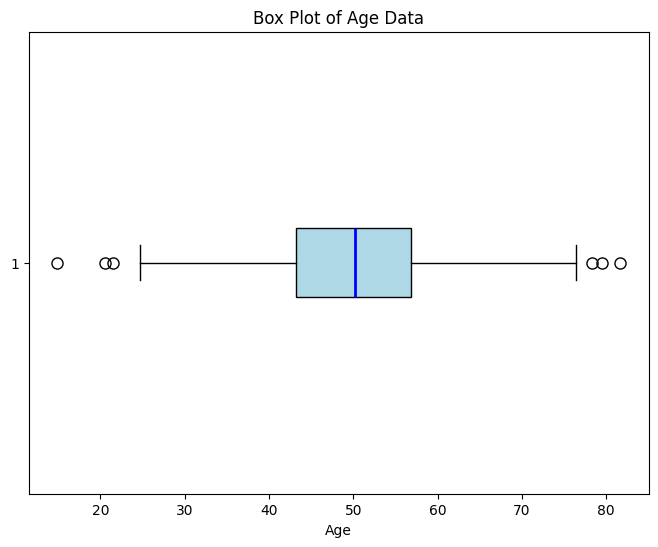

In [9]:
import matplotlib.pyplot as plt

# Create a box plot for the 'Age' data from the DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(normal_df['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), 
            whiskerprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8), 
            medianprops=dict(color='blue', linewidth=2))

# Title and labels
plt.title("Box Plot of Age Data")
plt.xlabel("Age")

# Show the plot
plt.show()


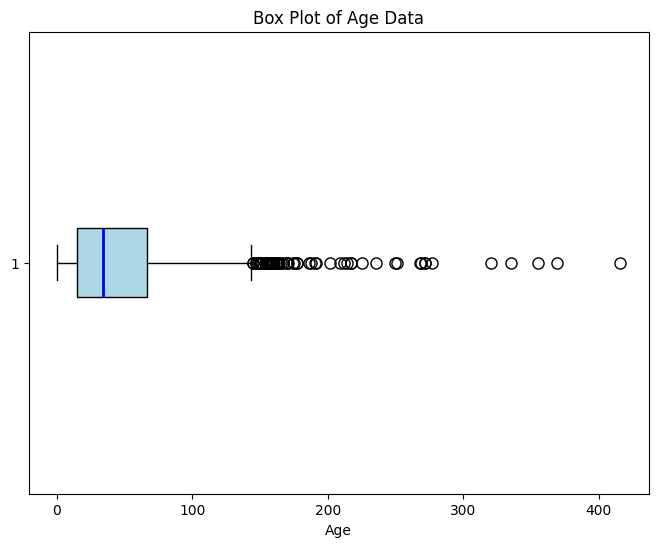

In [10]:
import matplotlib.pyplot as plt

# Create a box plot for the 'Age' data from the DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(skewed_df['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'), 
            whiskerprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8), 
            medianprops=dict(color='blue', linewidth=2))

# Title and labels
plt.title("Box Plot of Age Data")
plt.xlabel("Age")

# Show the plot
plt.show()


### Outliers Detection with K Means 

In [15]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[4, 5], [3, 2], [3, 4],[6, 3],[40, 41], [41, 41], [43, 44],[42,43]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[4, 5], [3, 2], [3, 4], [6, 3], [40, 41], [41, 41], [43, 44], [42, 43]]
Outliers: [[40, 41], [41, 41], [43, 44], [42, 43]]
Data without outliers: [[4, 5], [3, 2], [3, 4], [6, 3]]
